<a href="https://colab.research.google.com/github/guimaraess2/Kmeans/blob/master/Bank_Customer_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pwd

/content


In [0]:
cd sample_data/

/content/sample_data


In [0]:
!ls

 anscombe.json		       'CC GENERAL.csv'         README.md
 california_housing_test.csv    mnist_test.csv
 california_housing_train.csv   mnist_train_small.csv


Importando as bibliotecas / Importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [0]:
df=pd.read_csv("CC GENERAL.csv")

Dando uma olhada nas primeiras 5 linhas do dataset / 
Taking a look at the first 5 lines of the dataset

In [0]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Visualizando o tipo de dados / Viewing the data type

In [0]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Visualizando a quantidade de linhas e colunas / Viewing the number of rows and columns

In [0]:
df.shape

(8950, 18)

Fazendo uma análise estatística / Statistical analysis

> Indented block



In [0]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Quantidade de valores nulos / Number of null values

In [0]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Tratativa dos valores nulos através de preprocessamento de dados / Data Preprocessig

In [0]:
df.fillna(16, inplace=True)

In [0]:
df.shape

(8950, 18)

In [0]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Verificando se ainda há valores nulos / Checking for null values

In [0]:
df['MINIMUM_PAYMENTS'].isnull().sum()

0

Visualizando o nome das colunas / Viewing the column names

In [0]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Escolha dos atributos que serão analisados, neste caso seria 'CREDIT_LIMIT' e 'PAYMENTS' que estão nas colunas 13 e 14 / Choosing attributes to be analyzed

In [0]:
x = df.iloc[:,[13,14]].values


Padronizando os atributos através de escalonamento / Feature scalling

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


Aplicando WCSS que é soma da distância ao quadrado de todos os elementos até o centro do cluster / Measures sum of distances of observations from their cluster centroids

In [0]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Encontrando o número e clusters ideal / Choosing the right number of clusters

In [0]:
wcss

[193505438578.66815,
 103109208741.99283,
 69143037793.78583,
 51291707557.37188,
 38892907679.584946,
 32649320547.11454,
 27695261486.933933,
 24317465254.383526,
 21068843729.515934,
 19224324845.771744]

Aplicando o elbow method para encontrar o elbow point / Applying the elbow method to find the elbow point

Text(0, 0.5, 'WCSS')

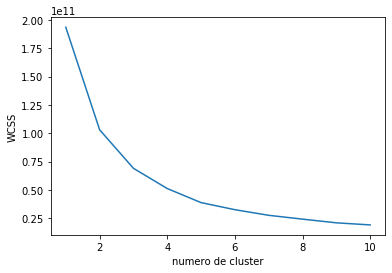

In [0]:
plt.plot(range(1,11),wcss)
plt.xlabel('numero de cluster')
plt.ylabel('WCSS')

Treinando o modelo / Training the model

In [0]:
kmeans=KMeans(n_clusters=4, random_state=0)
prev=kmeans.fit_predict(x)

Visualização dos dados / Data visualization

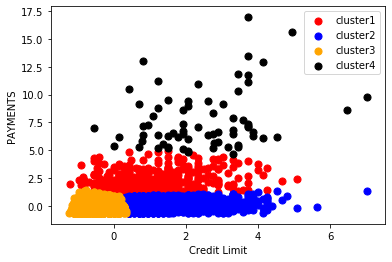

In [0]:
plt.scatter(x[prev==0,0], x[prev==0,1], s=50, c='red', label='cluster1')
plt.scatter(x[prev==1,0], x[prev==1,1], s=50, c='blue', label='cluster2')
plt.scatter(x[prev==2,0], x[prev==2,1], s=50, c='orange', label='cluster3')
plt.scatter(x[prev==3,0], x[prev==3,1], s=50, c='black', label='cluster4')
plt.xlabel('Credit Limit')
plt.ylabel('PAYMENTS')
plt.legend()


Agora é possível fazer campanha de marketing de clientes através da análise dos dados fornecida pelo Algoritmo KMeans que mostra os agrupamentos(clusters) de clientes de acordo com o limite de crédito e pagamentos efetuados.
